In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pickle
import json
from glob import glob
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
# from keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
X = np.load('X_nn.npy')
y = np.load('y_nn.npy')  
from sklearn.model_selection import train_test_split
X, XValidation, y, yValidation = train_test_split(X,y,test_size=0.2,random_state=42) # before model building
print(X.shape,y.shape,XValidation.shape,yValidation.shape)

(2195595, 18) (2195595, 2) (548899, 18) (548899, 2)


In [4]:
X_test = np.load('X_nn_test.npy')
y_test = np.load('y_nn_test.npy')  
print(X_test.shape,y_test.shape)

(389817, 18) (389817, 2)


In [104]:
from tensorflow.python.keras.layers.core import Dropout
model = keras.Sequential()
model.add(layers.Dense(12, input_dim=18, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# model.add(Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# ,kernel_regularizer=keras.regularizers.l2(0.01)
model.add(layers.Dense(2, activation='linear'))
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mse','accuracy'])
model_copy = model

In [105]:
history_v1 = model.fit(X, y, epochs=40,batch_size=1000,validation_data=(XValidation,yValidation))

Epoch 1/40
2196/2196 [==============================] - 9s 4ms/step - loss: 0.0539 - mse: 0.0539 - accuracy: 0.8008 - val_loss: 0.0526 - val_mse: 0.0526 - val_accuracy: 0.8986
Epoch 2/40
2196/2196 [==============================] - 9s 4ms/step - loss: 0.0459 - mse: 0.0459 - accuracy: 0.7577 - val_loss: 0.0476 - val_mse: 0.0476 - val_accuracy: 0.7274
Epoch 3/40
2196/2196 [==============================] - 9s 4ms/step - loss: 0.0434 - mse: 0.0434 - accuracy: 0.7574 - val_loss: 0.0429 - val_mse: 0.0429 - val_accuracy: 0.6980
Epoch 4/40
2196/2196 [==============================] - 8s 4ms/step - loss: 0.0421 - mse: 0.0421 - accuracy: 0.7552 - val_loss: 0.0426 - val_mse: 0.0426 - val_accuracy: 0.6572
Epoch 5/40
2196/2196 [==============================] - 8s 4ms/step - loss: 0.0415 - mse: 0.0415 - accuracy: 0.7698 - val_loss: 0.0413 - val_mse: 0.0413 - val_accuracy: 0.6116
Epoch 6/40
2196/2196 [==============================] - 8s 4ms/step - loss: 0.0412 - mse: 0.0412 - accuracy: 0.7829 - va

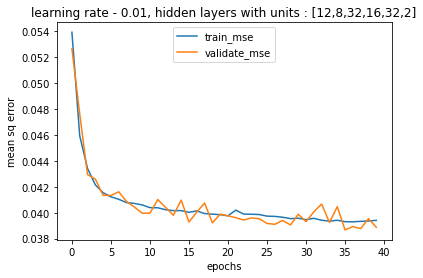

In [106]:

from matplotlib import pyplot
pyplot.plot(history_v1.history['mse'],label="train_mse")
pyplot.plot(history_v1.history['val_mse'],label="validate_mse")
pyplot.legend(loc='upper center')
plt.title('learning rate - 0.01, hidden layers with units : [12,8,32,16,32,2]')
plt.xlabel('epochs')
plt.ylabel('mean sq error')
# pyplot.plot(history.history['accuracy'])
pyplot.show()

In [107]:
history_v1.model.evaluate(X_test,y_test)

12182/12182 [==============================] - 18s 2ms/step - loss: 0.0397 - mse: 0.0397 - accuracy: 0.9228


[0.039745766669511795, 0.039745766669511795, 0.9228150844573975]